<a href="https://colab.research.google.com/github/cgpilapanta/timeseries/blob/main/TEG_Cap_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPÍTULO 03. ANÁLISE TEMPORAL**
---
*   Autor: Christian G. Pilapanta A.
*   Data : Setembro de 2024
*   Lotação: Departamento de Geomática - UFPR / Laboratorio de Geodésia Espacial e Hidrografia

---

**Definição do entorno de trabalho e Importação de dados**

In [122]:
#Bibliotecas de Python necessárias para rodar o código
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Eliminar alertas por versão
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [41]:
# Importar (clonar) repósitorio de GitHub
!rm -r timeseries
!git clone https://github.com/cgpilapanta/timeseries.git

Cloning into 'timeseries'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 227 (delta 85), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (227/227), 30.78 MiB | 5.98 MiB/s, done.
Resolving deltas: 100% (85/85), done.


## **3.1. Modelo geral e propriedades básicas**

### **3.1.1. Sistema dinâmico**

Obtida a série temporal $Z\left( t_{1} \right),...,Z\left( t_{n} \right)$, modelos **probabilísticos** ou **estocásticos** são construídos, no domínio temporal ou de frequências, com o intuito de tentar explicar e entender o comportamento por trás da série.

De acordo com Morettin, P. & Toloi, C. (2014), estes modelos devem ser simples e parcimoniosos (no sentido que o número de parâmetros envolvidos deve ser o menor possível) e, se possível, sua utilização não deve apresentar dificuldades às pessoas interessadas em manipulá-los.

De forma geral, muitas situações em ciências físicas, engenharia e outro tipo de ciências envolvem o conceito de *sistema dinâmico*, caracterizado por uma série de entrada $X(t)$, uma série de saída $Z(t)$ e uma função de transferência $v(t)$.

Dependendo do tipo da complexidade do modelo utilizado, o *sistema dinâmico* pode ser *linear* ou *não linear*, sendo os sitemas lineares de particular importância, devido a que permitem relacionar a saída com a entrada através de um funcional linear envolvendo $v(t)$.

Um exemplo simples deste tipo de modelo é o *modelo de função de transferência* de Box, Jenkins e Reinsel (1994):

$$Z\left ( t \right )=\sum_{\tau =0}^{\infty }v\left ( \tau  \right )X\left ( t-\tau  \right )$$

Neste caso, é de interesse (Morettin, P. & Toloi, C. 2014):

*   Estimar a função de transferência $v(t)$, conhecendo-se as séries de entrada e saída.
*   Fazer previsões da série $Z(t)$, com o conhecimento de observações da série de entrada $X(t)$.
*   Estudar o comportamento do sistema, *simulando-se* a série de entrada $X(t)$.
*   Controlar a série de saída $Z(t)$, de modo a trazê-la o mais próximo possível de um valor desejado, ajustando-se convenientemente a série de entrada $X(t)$ (i.e. filtragem de dados).

**Importante:**

*  Que características deve ter a série para poder ser expressa através de um modelo matemático (i.e. probabilístico ou estocástico)?.
*  Qual é o modelo matemático considerado como estándar na análise de séries de coordenadas? Ele é um *sistema dinâmico*?.
*  Que outro tipo de séries vocês conhecem na área das ciências geodésicas? Que modelo expressa seu comportamento?

### **3.1.2. Estacionariedade**

Uma das suposições mais frequentes que se faz a respeito de uma série temporal é a de que ela é estacionária, ou seja, ela se desenvolve no tempo aleatoriamente ao redor de uma média constante, refletindo alguma forma de equilíbrio (i.e. estabilidade). No entanto, a maior parte das séries que encontramos na prática apresentam alguma forma de não-estacionariedade.

*  No caso das séries de coordenadas das componentes horizontais (i.e. norte e este), por exemplo, elas apresentam em geral *tendências*, sendo o caso mais simples aquele em que a série flutua ao redor de uma reta, com inclinação positiva ou negativa (i.e. tendência linear - modelo de regressão estándar).

  <center><img src=https://sirgas.ipgh.org/docs/series/UFPR.png width="800"></center>

  <center>Figura 01. Serie de coordenadas. Estação de Monitoramento Continuo UFPR</center>

  <center>Fonte: sirgas.org (2024)</center>

*  No caso de uma séries sísmica ou gravimétrica, por sua vez, elas geralmente apresentam uma forma de não-estacionariedade explosiva, devido a uma força específica que impacta de forma direta o comportamento da série.

  <center><img src=https://www.researchgate.net/profile/Cheinway-Hwang/publication/225752859/figure/fig1/AS:341698430423041@1458478662324/1-Hz-data-series-recorded-during-the-period-7-13-May-2008-by-the-SG-at-HS-station-and-a.png width="600"></center>

  <center>Figura 02. Serie gravimétrica e sísmica em Taiwan</center>

  <center>Fonte: Shen, W. et. al. (2008)</center>

Uma série também pode ser estacionaria durante um período muito longo, como a série de coordenadas GPS, mas pode ser estacionária apenas em períodos muito curtos, mudando de nível e ou inclinação.

<center><img src=https://iili.io/dSLhJmF.png width="400"></center>

<center>Figura 03. Série não-estacionária quanto ao nível e inclinação.</center>

<center>Fonte: Morettin, P. & Toloi, C. (2014)</center>

Neste caso, um modelo como o ARIMA (auto-regressivo integrado de médias móveis) pode ser capaz de descrever de maneira satisfatória este tipo de séries sempre que não apresentem comportamento explosivo (i.e. não-estacionariedade homogênea).

Neste tipo de não-estacionariedade a série flutua ao redor de um nível por certo tempo, depois  de nível e flutua ao redor de um novo nível e assim por diante, ou então muda de inclinação, ou ambas as coisas.


### **3.1.3. Não-estacionariedade e diferenciação**

Como a maioria dos procedimentos de análise estatística de séries temporais supõe que estas sejam estacionárias, será necessário transformar os dados originais, se estes não formam uma série estacionaria.

A transformação (na proxima aula sera abordada detalhadamente) mais comun consiste em tomar *diferenças* sucessivas da série original, até se obter uma série estacionária.

Desta maneira:

*  A primeira diferença de $Z(t)$ é definida por:

 $$\Delta Z\left ( t \right )=Z\left ( t \right )-Z\left ( t-1 \right )$$

*  A segunda diferença é:

 $$\Delta ^{2}Z\left ( t \right )=\Delta \left [ \Delta Z\left ( t \right ) \right ]=\Delta \left [ Z\left ( t \right ) -Z\left ( t-1 \right )\right ]$$

 ou seja,

 $$\Delta ^{2}Z\left ( t \right )=Z\left ( t \right )-2Z\left ( t-1 \right )+Z\left ( t-2 \right )$$

De modo geral, a $n$-ésima diferença de $Z(t)$ é:

$$\Delta ^{n}Z\left ( t \right )=\Delta \left [ \Delta^{n-1} Z\left ( t \right ) \right ]$$

**Importante:**

* Idealmente, o papel de uma transformação é tentar estabilizar a variância em uma série temporal, onde mudanças rápidas, podem afetar a capacidade de um método de previsão de gerar resultados precisos.

* Em situações normais, será suficiente tomar uma ou duas diferenças para que a série se torne estacionária.




#### Exemplo 01. Série de coordenadas GPS
---
A. Importar conjunto de dados

In [3]:
# Definir nomes de cada coluna
header = ['Station','Date','Decimal Year','MJD','GPS Week','Week Day','Longitude','East','North','Up','Antenna Height','dE','dN','dU','corrEN','corrEU','corrNU']

# Importar arquivo de texto (dataframe Pandas)
df_gps = pd.read_csv("/content/timeseries/datasets/ngl/UFPR.tenv", names=header, delim_whitespace=True)

# Apresentar tabela de dados
df_gps.head()

,Station,Date,Decimal Year,MJD,GPS Week,Week Day,Longitude,East,North,Up,Antenna Height,dE,dN,dU,corrEN,corrEU,corrNU
0,UFPR,96DEC14,1996.9528,50431,883,6,-49.2,-3113.36397,-2.815723e+06,925.75507,0.155,0.00098,0.00096,0.00441,0.03008,0.00245,0.07710
1,UFPR,96DEC15,1996.9555,50432,884,0,-49.2,-3113.36524,-2.815723e+06,925.75194,0.155,0.00097,0.00099,0.00439,0.00931,0.04183,0.05181
2,UFPR,96DEC16,1996.9582,50433,884,1,-49.2,-3113.36607,-2.815723e+06,925.74076,0.155,0.00100,0.00098,0.00442,-0.03754,0.00249,0.06097
3,UFPR,96DEC17,1996.9610,50434,884,2,-49.2,-3113.36379,-2.815723e+06,925.74558,0.155,0.00103,0.00105,0.00468,0.02839,0.03994,0.04081
4,UFPR,96DEC18,1996.9637,50435,884,3,-49.2,-3113.36239,-2.815723e+06,925.75661,0.155,0.00100,0.00096,0.00427,-0.03851,0.00671,0.02549


B. Plotar os dados

Text(0, 0.5, 'Up (m)')

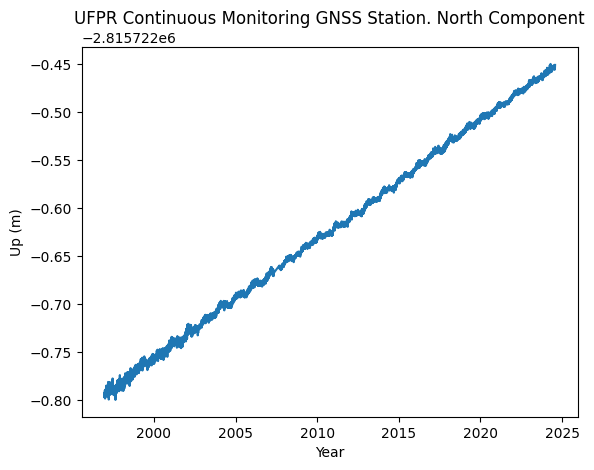

In [15]:
# Intervalos de Tempo
t = df_gps["Decimal Year"]

# Componente a ser analisada
s = df_gps["North"]

# Apresentação de resultados
plt.plot(t, s)
plt.title('UFPR Continuous Monitoring GNSS Station. North Component')
plt.xlabel("Year")
plt.ylabel("Up (m)")

C. Análise de estacionariedade (média e variância)

In [16]:
# Cálculo da média dos dados
mean_s = np.mean(s)

# Cálculo da variância dos dados
var_s = np.var(s)

print('mean=%f' % (mean_s))
print('var=%f' % (var_s))

mean=-2815722.620499
var=0.009699


D. Histograma do conjunto de dados

Text(0.5, 1.0, "Histogram with 'auto' bins")

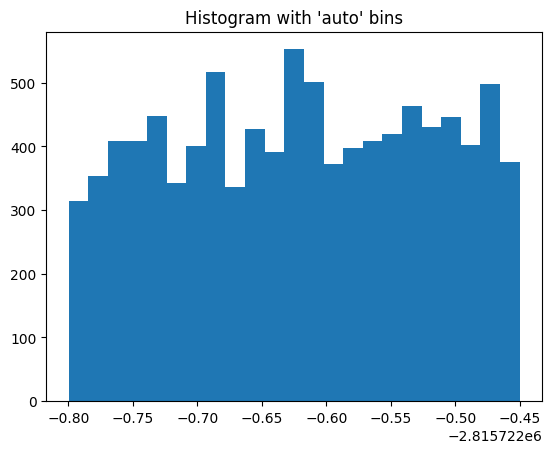

In [17]:
plt.hist(s, bins='auto')
plt.title("Histogram with 'auto' bins")

E. Normalizar os dados

Text(0, 0.5, 'Up (m)')

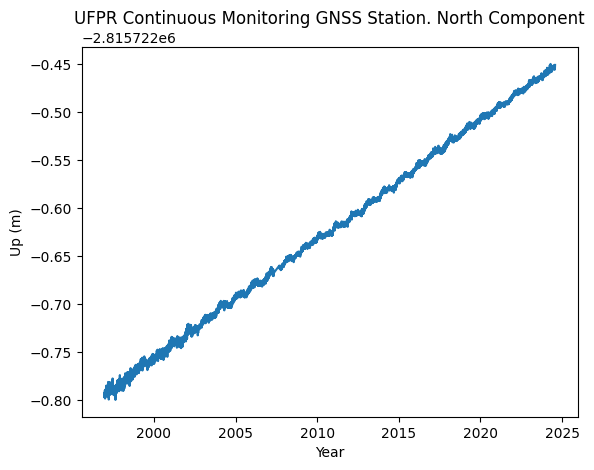

In [18]:
# Remoção da média do conjunto de dados
s_zero = s - np.mean(s)

# Apresentação de resultados
plt.plot(t, s)
plt.title('UFPR Continuous Monitoring GNSS Station. North Component')
plt.xlabel("Year")
plt.ylabel("Up (m)")

F. Calcular a média e variância dos dados normalizados

In [19]:
# Cálculo da média dos dados
mean_srz = np.mean(s_zero)

# Cálculo da variância dos dados
var_srz = np.var(s_zero)

print('mean=%f' % (mean_srz))
print('var=%f' % (var_srz))

mean=0.000000
var=0.009699


G. Histograma do conjunto de dados normalizados

Text(0.5, 1.0, "Histogram with 'auto' bins")

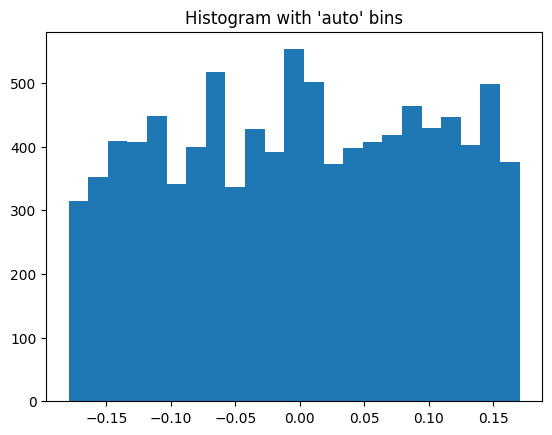

In [21]:
plt.hist(s_zero, bins='auto')
plt.title("Histogram with 'auto' bins")

H. Diferenciação do conjunto de dados normalizados (1a diferença)

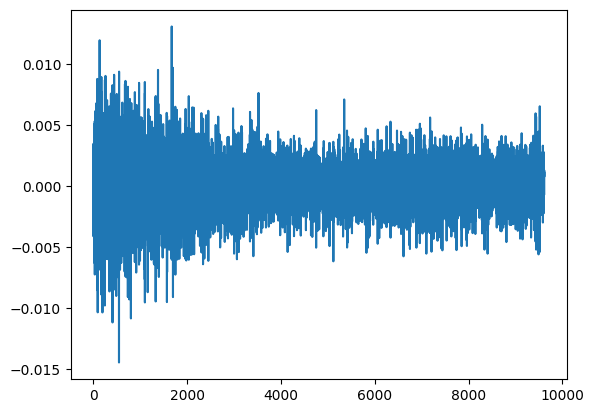

In [25]:
# Cálculo da primeira diferença
diff_01 = s_zero.diff()

# Apresentação de resultados
plt.plot(diff_01)
plt.show()

I. Calcular a média e variância dos dados diferenciados (1a diferença)

In [27]:
# Cálculo da média dos dados
mean_diff_01 = np.mean(diff_01)

# Cálculo da variância dos dados
var_diff_01 = np.var(diff_01)

print('mean=%f' % (mean_diff_01))
print('var=%f' % (var_diff_01))

mean=0.000036
var=0.000004


J. Histograma do conjunto de dados diferenciados (1a diferença)

Text(0.5, 1.0, "Histogram with 'auto' bins")

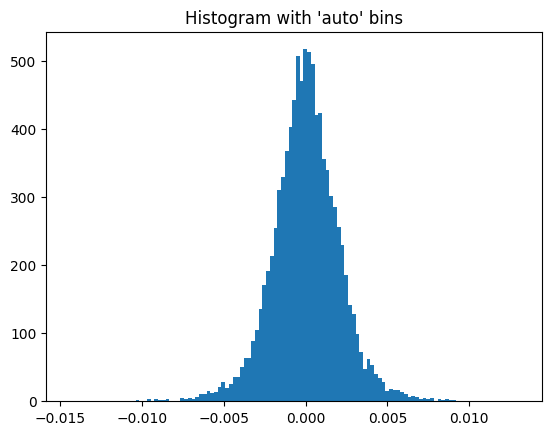

In [26]:
plt.hist(diff_01, bins='auto')
plt.title("Histogram with 'auto' bins")

K. Diferenciação do conjunto de dados (2a diferença)

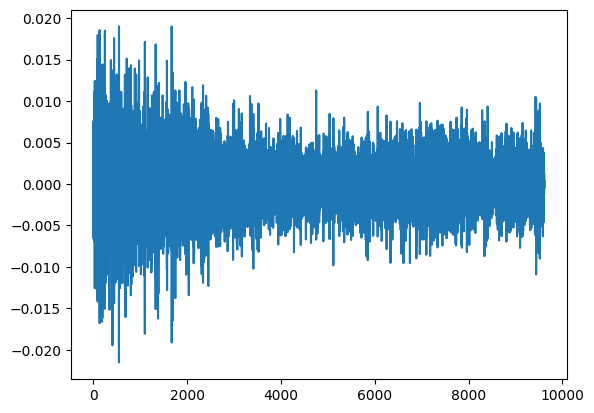

In [28]:
# Cálculo da primeira diferença
diff_02 = diff_01.diff()

# Apresentação de resultados
plt.plot(diff_02)
plt.show()

L. Cálculo da média e variância dos dados diferenciados (2a diferença)

In [29]:
# Cálculo da média dos dados
mean_diff_02 = np.mean(diff_02)

# Cálculo da variância dos dados
var_diff_02 = np.var(diff_02)

print('mean=%f' % (mean_diff_02))
print('var=%f' % (var_diff_02))

mean=-0.000000
var=0.000012


M. Histograma do conjunto de dados diferenciados (2a diferença)

Text(0.5, 1.0, "Histogram with 'auto' bins")

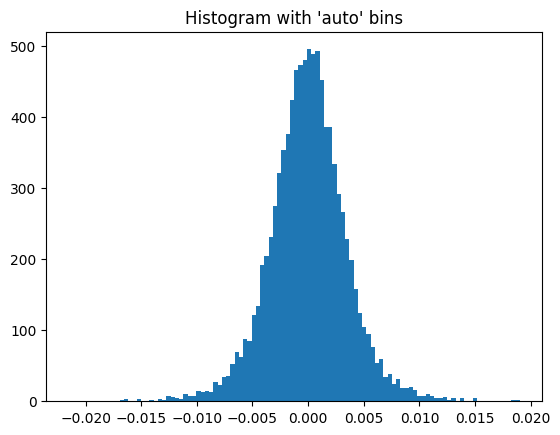

In [30]:
plt.hist(diff_02, bins='auto')
plt.title("Histogram with 'auto' bins")

### **3.1.4. Tendência, Sazonalidade e Resíduos. Decomposição Temporal**

Anteriormente, foi utilizada a *diferenciação* como uma alternativa simples para transformar uma série não estacionária a estacionária, no entanto, neste processo não foram consideradas as propriedades fundamentais da série, tais como a tendência e a sazonalidade.

A tendência e sazonalidade são os componentes não observáveis de uma série temporal que representam, respectivamente, o movimento de longo prazo e o padrão regular (queda/subida) de um determinado período do conjunto de dados. Os resíduos, por sua vez, são erros aleatórios de comportamento aleatório que não podem ser explicados deterministicamente.

Desta maneira, para uma determinada série temporal $\{Y_t\}_t$, às vezes resulta importante procurar formas de dividi-lá por meio de uma função de decomposição $f$, de forma que:

$$Y_{t}=f\left ( T_{t},S_{t},E_{t} \right )$$

onde para um determinado tempo $t$, $T_t$ e $S_t$ denotam os componentes de tendência e sazonalidade, respectivamente, e $E_t$ corresponde ao erro ou resíduos que resulta de tal decomposição.

As decomposições são úteis para uma melhor compreensão dos padrões constituintes em uma série temporal, mas não necessariamente para a geração de previsões.

De forma geral, existem dois tipos principais de métodos de decomposição de séries temporais:

1.   Decomposição aditiva: assume que os componentes são somados para formar a série temporal original.

  $$f\left ( T_{t},S_{t},E_{t} \right ):=T_{t}+S_{t}+E_{t}$$

2.   Decomposição multiplicativa: assume que os componentes são multiplicados para formar a série temporal original.

  $$f\left ( T_{t},S_{t},E_{t} \right ):=T_{t}\times S_{t}\times E_{t}$$

**Importante:**

É importante salientar que em termos de como uma decomposição é computada, geralmente se começa com a estimativa da tendência e, então, dependendo da natureza de $f$, o componente sazonal é estimado.

#### Exemplo 02. Séries de vendas e de demanda elétrica
---

A. Importação e apresentação do conjunto de dados

**1. Série de vendas de tijolos nos Estados Unidos**

In [31]:
# Import data
series_a = pd.read_excel('/content/timeseries/datasets/zemkoho/ClayBricks.xls', sheet_name ='BRICKSQ', header = 0, index_col =0, parse_dates = True)

# Plot data
series_a.plot()

**2. Série da demanda elétrica nos Estados Unidos**

In [32]:
# Import data
series_b = pd.read_excel('/content/timeseries/datasets/zemkoho/Electricity.xls', sheet_name ='Data', header = 0, index_col =0, parse_dates = True)

# Plot data
series_b.plot()

**Interpretação:**

Por inspeção, podemos ver:



*   As 2 séries apresentam uma tendência global crescente. No entanto, na venda de tijolos de argila, há uma tendência global geral com aumento constante ao longo do tempo até 1965, onde começamos a ter algumas grandes flutuações ocasionais que são difíceis de explicar e, portanto, difíceis de prever sem conhecer as causas subjacentes. Isso pode ser um reflexo de um comportamento de tendência cíclica na série temporal.
*  Claramente, a tendência e o comportamento cíclico podem ser facilmente identificados a partir dos gráficos. No entanto, ao contrário das tendências, a sazonalidade pode ser mais complicada de observar.
*  Considerando o papel importante que a identificação da sazonalidade desempenha no desenvolvimento/seleção de alguns métodos de previsão (por exemplo, suavização exponencial e métodos ARIMA), é necessário prestar atenção em como avaliá-la.
*   No caso da segunda série, é possivel ver uma série de picos e vales ocorrendo em intervalos regulares com uma crecimento explosivo.



B. Análise visual da sazonalidade das séries. Gráficos de sazonalidade

**1. Série de vendas de tijolos nos Estados Unidos**

<ipython-input-33-9e0540cfd825>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



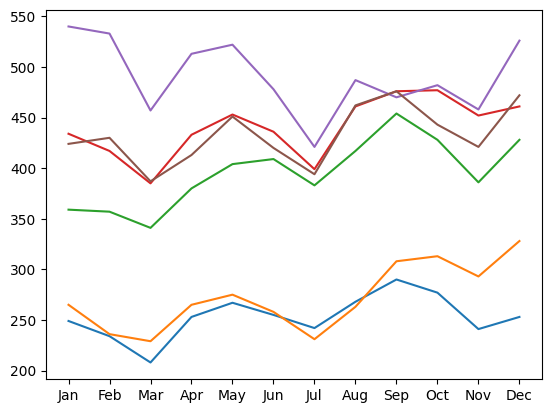

In [33]:
# Import data
series_a1 = pd.read_excel('/content/timeseries/datasets/zemkoho/ClayBricks.xls', sheet_name ='SeasonalData', header = 0, index_col =0, parse_dates = True)

# Plot data
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, months)
plt.plot(x, series_a1)
plt.show()

**2. Série da demanda elétrica nos Estados Unidos**

<ipython-input-29-38a26858b6fa>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series_b1 = pd.read_excel('/content/timeseries/datasets/zemkoho/Electricity.xls', sheet_name ='SeasData', header = 0, index_col =0, parse_dates = True)


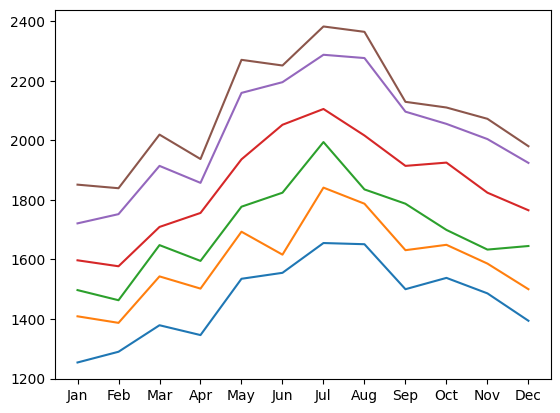

In [ ]:
# Import data
series_b1 = pd.read_excel('/content/timeseries/datasets/zemkoho/Electricity.xls', sheet_name ='SeasData', header = 0, index_col =0, parse_dates = True)

# Plot data
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, months)
plt.plot(x, series_b1)
plt.show()

**Interpretação:**

*  Claramente é possível observar uma sazonalidade nos 2 conjuntos de dados, sendo predominante no segundo conjunto.
*  Desta maneira, em princípio, é possivel realizar uma estimativa inicial para os dados de eletricidade, mas não necessariamente para os dados de tijolos.

C. Decomposição temporal

**1. Série de vendas de tijolos nos Estados Unidos**

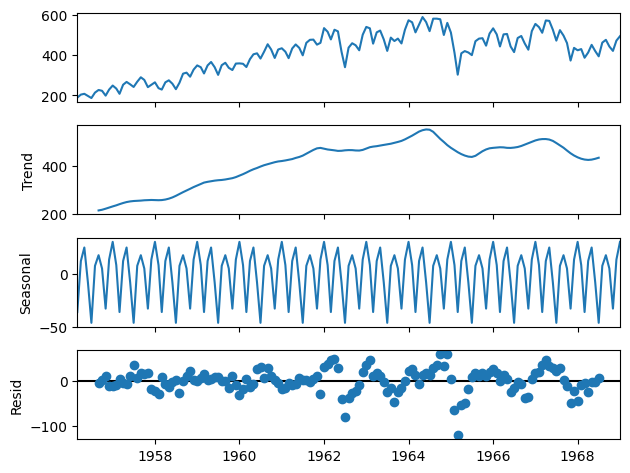

In [35]:
# Additive decomposition
result = seasonal_decompose(series_a, model='additive')

# Plot data
result.plot()
plt.show()

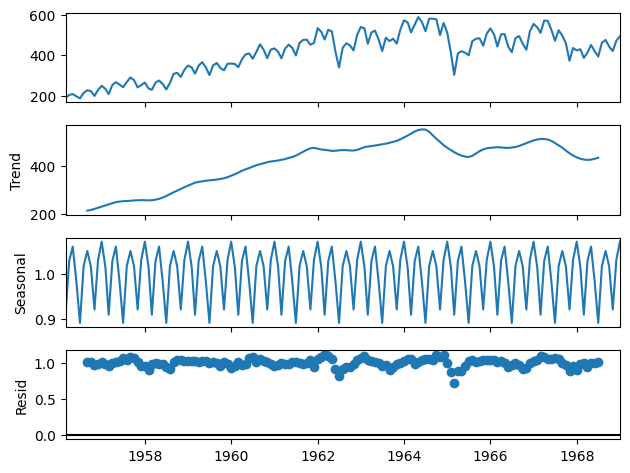

In [37]:
# Multiplicative decomposition
result = seasonal_decompose(series_a, model='multiplicative')

# Plot data
result.plot()
plt.show()

**2. Série da demanda elétrica nos Estados Unidos**

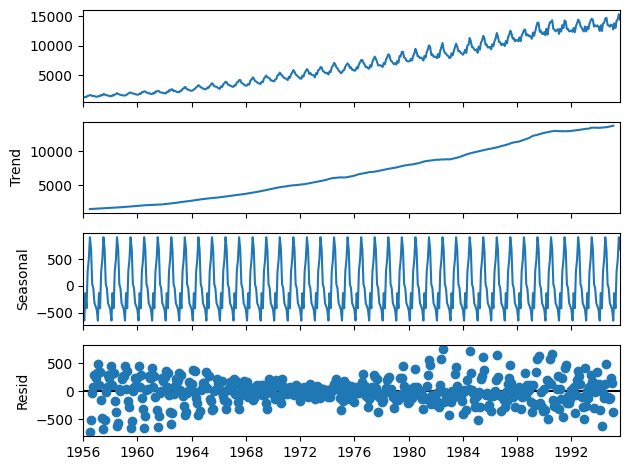

In [38]:
# Additive decomposition
result = seasonal_decompose(series_b, model='additive')

# Plot data
result.plot()
plt.show()

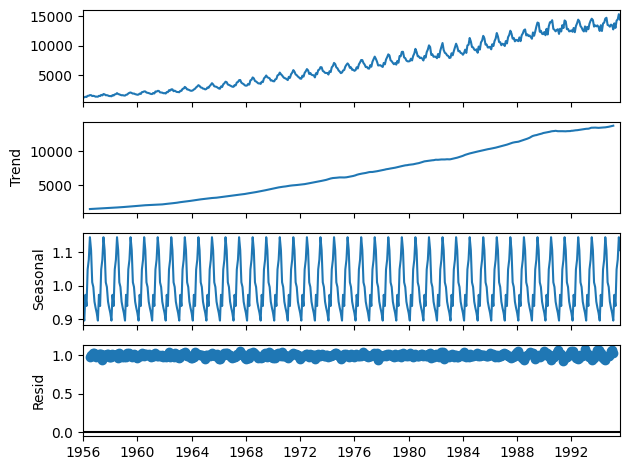

In [39]:
# Multiplicative decomposition
result = seasonal_decompose(series_b, model='multiplicative')

# Plot data
result.plot()
plt.show()

### **3.1.5. Função de Autocorrelação, Estacionariedade e Sazonalidade**

Sabe-se que a autocorrelação é usada para medir o grau de correlação entre diferentes defasagens de tempo em uma série temporal. No entanto, a função de autocorrelação (ACF) é crucial na avaliação de muitas propriedades em estatística, incluindo a sazonalidade, ruído branco e estacionariedade de uma série.

De forma geral, a sazonalidade de uma série se traduz em valores maiores de autocorrelação. Portanto, a sazonalidade deve ser visualizada em gráficos de autocorrelação parcial das séries onde os picos significantes em intervalos regulares durante o ano confirmam a presença da componente sazonal.

**Importante:**

Pode ser válido diferenciar a série temporal, se a mesma for não estacionária, para produzir os gráficos de autocorrelação, possibilitando uma leitura “mais limpa”.

#### Exemplo 03. Séries de vendas de materiais de construção na Australia
---

<ipython-input-45-a897bab38d07>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-45-a897bab38d07>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



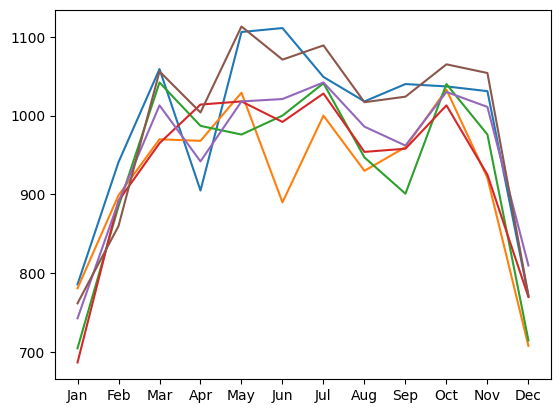

In [45]:
series1 = pd.read_excel('/content/timeseries/datasets/zemkoho/CementProduction.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
series2 = pd.read_excel('/content/timeseries/datasets/zemkoho/CementProduction.xls', sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)

# Plot data
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, months)
plt.plot(x, series2)
plt.show()

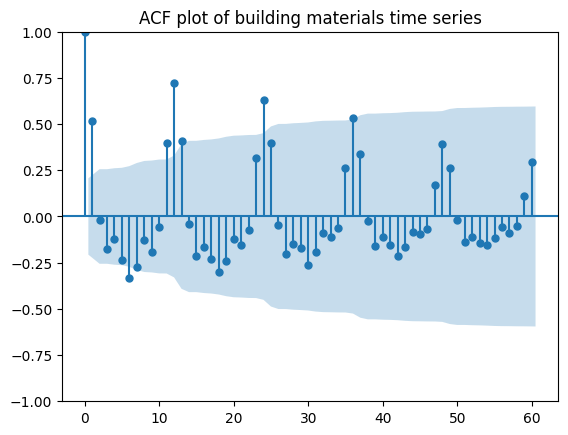

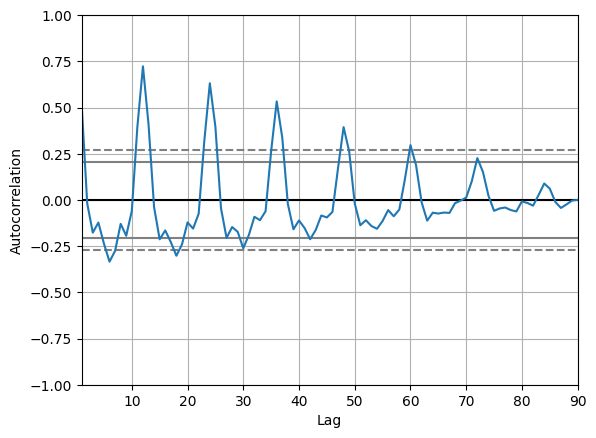

In [46]:
plot_acf(series1, title='ACF plot of building materials time series', lags=60)
plt.show()

autocorrelation_plot(series1)
plt.show()

**Interpretação:**

*  Pode-se ver que os gráficos sazonais podem ser um pouco confusos. Mas o gráfico de autocorrelação (ACF) confirma fortemente a presença de sazonalidade, pois picos e vales estão ocorrendo aproximadamente em intervalos regulares, ou seja, a cada 12 defasagens de tempo, pois os dados são feitos de observações mensais.
*  O segundo gráfico é outra forma de representar a função de autocorrelação em forma de curva, sendo muitas vezes mais explicativo e determinante.

### **3.1.6. Valores atípicos e/ou discrepantes**

As mudanças no nível de uma série temporal que não puderem ser explicadas são referidas como valores discrepantes. Estas observações são inconsistentes com o restante da série e podem influenciar significativamente a análise e, consequentemente, afetar a capacidade de previsão do modelo de série temporal.

Quando os valores discrepantes, ou também chamados de **"outliers"** afetam somente o nível médio da série, eles são  classificados como *deterministas*. Alguns tipos de outliers deterministas são (IBM.com, 2024):

1. **Outlier Aditivo**. Um valor discrepante aditivo aparece como um valor surpreendentemente grande ou pequeno ocorrendo para uma observação única. Observações subsequentes não são afetadas por um valor discrepante aditivo. Os valores discrepantes aditivos consecutivos normalmente são referidos como correções de valor discrepante aditivo.
2. **Innovational Outlier**. Um valor discrepante inovador é caracterizado por um impacto inicial com efeitos que aguardam observações subsequentes. A influência dos valores discrepantes pode aumentar com o decorrer do tempo.
3. **Valor Discrepante de Mudança de Nível**. Para uma mudança de nível, todas as observações que aparecerem após o valor discrepante se movem para um novo nível. Em contraste com valores discrepantes aditivos, um valor discrepante de mudança de nível afeta muitas observações e tem um efeito permanente.
4. **Valor Discrepante de Mudança Temporária**. Os valores discrepantes de mudança temporária são semelhantes aos valores discrepantes de mudança de nível, mas o efeito do valor discrepante diminui exponencialmente durante as observações subsequentes. Eventualmente, a série retorna para seu nível normal.
5. **Valor Discrepante Aditivo Sazonal**. Um valor discrepante aditivo sazonal aparece como um valor surpreendentemente grande ou pequeno ocorrendo repetidamente em intervalos regulares.
6. **Valor Discrepante de Tendência Local**. Um valor discrepante de tendência local produz um desvio geral na série causado por um padrão nos valores discrepantes após o início do valor discrepante inicial.

De forma geral, a detecção de valores discrepantes em séries temporais envolve determinar o local, o tipo e a magnitude de ditos valores.

### **3.1.7. Identificação de outliers. A regra do $3\sigma $**

Um dos métodos mais usados para deteção e eliminação de **outliers** baseia-se na chamada regra do $3\sigma $. Essa abordagem depende do conceito estatístico de desvio padrão, que mede o quanto os pontos de dados se desviam do valor médio.

Três limites de $\sigma$ (sigma) são definidos como o intervalo de valores que deve conter 99,7% dos pontos de dados se os dados forem normalmente distribuídos. Qualquer valor fora desse intervalo é considerado um outlier.

Para entender melhor a regra do $3\sigma $, alguns pontos chave devem ser considerados:

1. A regra baseia-se na suposição de distribuição normal. Isso significa que os pontos de dados devem seguir uma curva em forma de sino, com a maioria dos valores agrupados em torno do valor médio e menos valores à medida que nos afastamos da média. Se os dados não seguirem uma distribuição normal.

2. A regra pode ser usada para detectar outliers positivos e negativos. Um outlier positivo é um valor maior que o limite superior de três limites de $\sigma$, enquanto um outlier negativo é um valor menor que o limite inferior dos três limites de $\sigma$.

4. A regra pode ser ajustada para ser mais ou menos rigorosa, dependendo do nível de sensibilidade necessário. Por exemplo, se queremos ser mais conservadores na detecção, podemos usar $2\sigma $, o que conterá 95% dos pontos de dados.

#### Exemplo 04. Série de coordenadas. Deteção de outliers pela regra do $3\sigma $
---

A. Amostragem do conjunto de dados

In [103]:
# Definir coluna "Date" como indexador da Tabela
df_gps_t = df_gps.set_index('Decimal Year')

# Definir o intervalo de tempo para amostragem
df_gps_range = df_gps_t.loc['2008':'2024']

df_gps_range.head()

,Station,Date,MJD,GPS Week,Week Day,Longitude,East,North,Up,Antenna Height,dE,dN,dU,corrEN,corrEU,corrNU
Decimal Year,,,,,,,,,,,,,,,,
2008.0000,UFPR,08JAN01,54466,1460,2,-49.2,-3113.39851,-2.815723e+06,925.78285,0.1,0.00074,0.00076,0.00311,0.04948,0.01105,0.09435
2008.0027,UFPR,08JAN02,54467,1460,3,-49.2,-3113.39921,-2.815723e+06,925.78353,0.1,0.00076,0.00078,0.00325,0.05720,0.01940,0.11799
2008.0055,UFPR,08JAN03,54468,1460,4,-49.2,-3113.39896,-2.815723e+06,925.77630,0.1,0.00073,0.00076,0.00308,0.09026,0.04110,0.07430
2008.0082,UFPR,08JAN04,54469,1460,5,-49.2,-3113.40123,-2.815723e+06,925.78228,0.1,0.00074,0.00075,0.00309,0.09465,-0.00029,0.08889
2008.0110,UFPR,08JAN05,54470,1460,6,-49.2,-3113.39712,-2.815723e+06,925.77837,0.1,0.00074,0.00076,0.00313,0.07715,-0.01121,0.07901


B. Histograma do conjunto de dados amostrados

<ipython-input-104-ee41c8e9e18e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




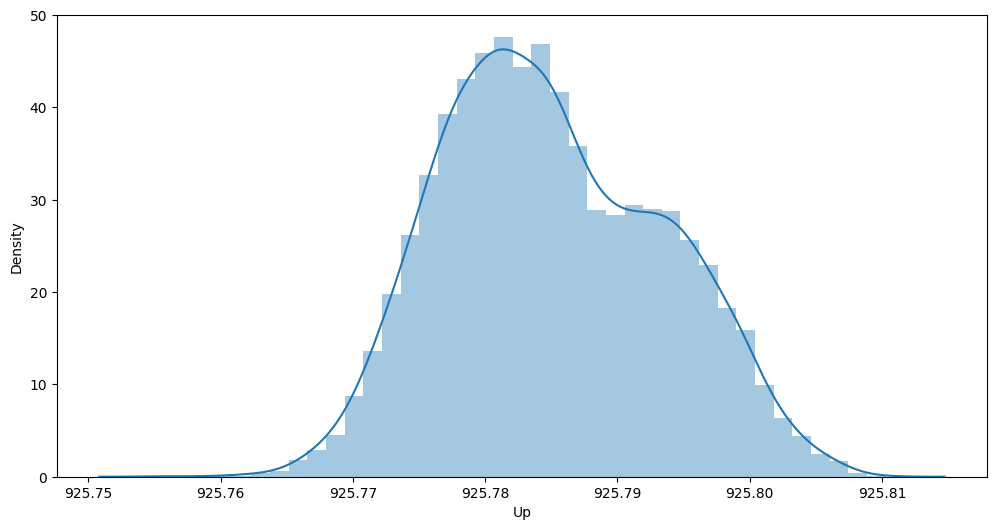

In [104]:
plt.figure(figsize=(12,6))
sns.distplot(df_gps_range['Up'])
plt.show()

C. Determinação dos límites $3\sigma$

In [110]:
# Finding the bounadray values
Height_limit = df_gps_range["Up"].mean()+3*df_gps_range["Up"].std()
Lowest_limit = df_gps_range["Up"].mean()-3*df_gps_range["Up"].std()

# Identify anomalies
anomalies = df_gps_range[(df_gps_range["Up"] >  Height_limit )|(df_gps_range["Up"] < Lowest_limit)]

E. Apresentação dos resultados

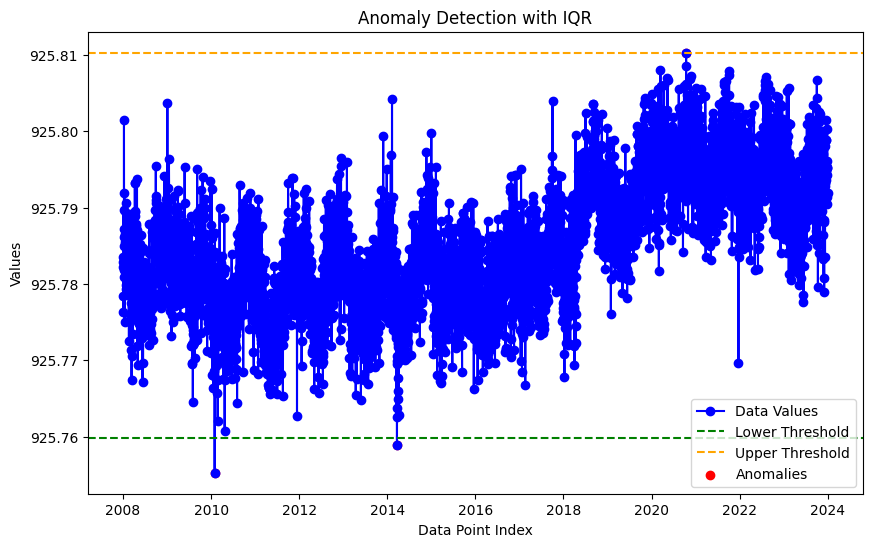

Anomalies:
             Station     Date    MJD  GPS Week  Week Day  Longitude  \
Decimal Year                                                          
2010.0808       UFPR  10JAN30  55226      1568         6      -49.2   
2014.2204       UFPR  14MAR22  56738      1784         6      -49.2   
2020.7858       UFPR  20OCT14  59136      2127         3      -49.2   

                    East         North         Up  Antenna Height       dE  \
Decimal Year                                                                 
2010.0808    -3113.40615 -2.815723e+06  925.75528             0.1  0.00073   
2014.2204    -3113.42295 -2.815723e+06  925.75892             0.1  0.00072   
2020.7858    -3113.44464 -2.815722e+06  925.81028             0.1  0.00075   

                   dN       dU   corrEN   corrEU   corrNU  
Decimal Year                                               
2010.0808     0.00076  0.00321  0.03406 -0.04085  0.12578  
2014.2204     0.00077  0.00320  0.01274  0.00911  0.02711  
20

In [111]:
# Plot the values
plt.figure(figsize=(10, 6))
plt.plot(df_gps_range['Up'], label='Data Values', marker='o', linestyle='-', color='blue')

# Plot the thresholds
plt.axhline(y=Lowest_limit, color='green', linestyle='--', label='Lower Threshold')
plt.axhline(y=Height_limit, color='orange', linestyle='--', label='Upper Threshold')

# Highlight anomalies on the graph
plt.scatter(anomalies.index, anomalies['Up'], color='red', label='Anomalies')

# Set labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Anomaly Detection with IQR')
plt.legend()

# Show the plot
plt.show()

# Print the anomalies
print("Anomalies:")
print(anomalies)

### **3.1.8. Identificação de outliers. Rango Interquartil**

A identificação de outliers (i.e., valores atípicos, distantes dos demais pontos da série) pode ser feita utilizando o chamado de amplitude ou rango interquartil (IQR). Neste caso, entende-se como um outlier, valores menores que $Q_1 - 1,5  \times  IQR$ ou valores maiores que $Q_3 + 1,5  \times IQR$.

Estes valores também são representados no boxplot, mas como pontos acima ou abaixo da linha conectada à caixa. Isto é:

<center><img src=https://estatsite.com.br/wp-content/uploads/2018/12/50-768x498.png width="400"></center>

  <center>Figura 04. Boxplot e Amplitude Interquartil</center>

  <center>Fonte: estatsite.com.br (2018)</center>

#### Exemplo 05. Série de coordenadas. Deteção de outliers pela método IQR
---

A. Cálculo dos Intervalos IQR

In [112]:
# Calculate Quartiles and IQR
Q1 = df_gps_range['Up'].quantile(0.25)
Q3 = df_gps_range['Up'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for anomaly detection (e.g., 1.5 times IQR)
threshold_lower = Q1 - 1.5 * IQR
threshold_upper = Q3 + 1.5 * IQR

# Identify anomalies
anomalies = df_gps_range[(df_gps_range['Up'] < threshold_lower) | (df_gps_range['Up'] > threshold_upper)]

B. Apresentação dos resultados

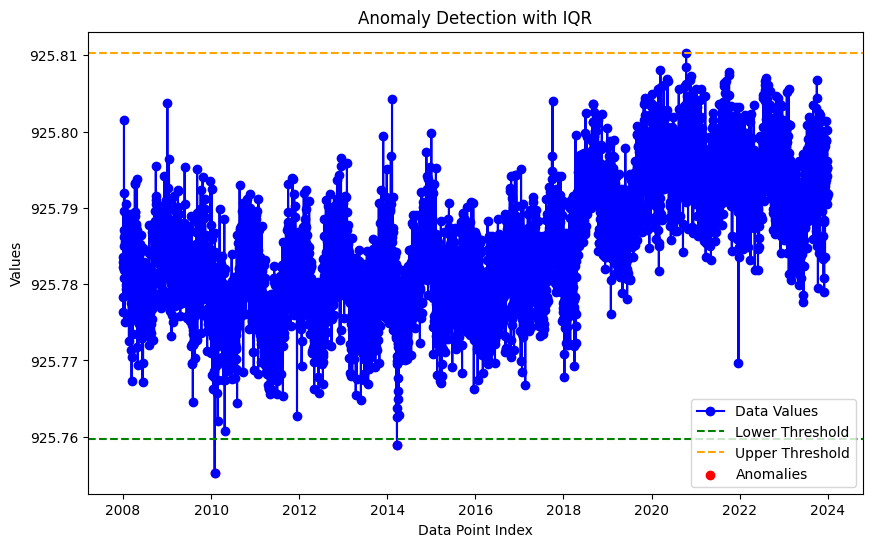

Anomalies:
             Station     Date    MJD  GPS Week  Week Day  Longitude  \
Decimal Year                                                          
2010.0808       UFPR  10JAN30  55226      1568         6      -49.2   
2014.2204       UFPR  14MAR22  56738      1784         6      -49.2   

                    East         North         Up  Antenna Height       dE  \
Decimal Year                                                                 
2010.0808    -3113.40615 -2.815723e+06  925.75528             0.1  0.00073   
2014.2204    -3113.42295 -2.815723e+06  925.75892             0.1  0.00072   

                   dN       dU   corrEN   corrEU   corrNU  
Decimal Year                                               
2010.0808     0.00076  0.00321  0.03406 -0.04085  0.12578  
2014.2204     0.00077  0.00320  0.01274  0.00911  0.02711  


In [113]:
# Plot the values
plt.figure(figsize=(10, 6))
plt.plot(df_gps_range['Up'], label='Data Values', marker='o', linestyle='-', color='blue')

# Plot the thresholds
plt.axhline(y=threshold_lower, color='green', linestyle='--', label='Lower Threshold')
plt.axhline(y=threshold_upper, color='orange', linestyle='--', label='Upper Threshold')

# Highlight anomalies on the graph
plt.scatter(anomalies.index, anomalies['Up'], color='red', label='Anomalies')

# Set labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Anomaly Detection with IQR')
plt.legend()

# Show the plot
plt.show()

# Print the anomalies
print("Anomalies:")
print(anomalies)

### **3.1.9. Homocedasticidade e Heterocedasticidade**

De forma geral, o modelo de Gauss-Markov estabelece que para descrever uma série através de um modelo matemático geral (i.e. previsão por mínimos quadrados), é necessário que dita série cumpra alguns requisitos tanto dos **processos de Gauss**, como dos **processos de Markov** (Processo Ornstein–Uhlenbeck):.

<center><img src=https://iili.io/dVHdi2n.md.png width="500"></center>

De forma particular, quando falamos do comportamento da variância, se diz que:

1. A variabilidade dos erros $e$, condicionada aos valores das variáveis explanatórias é constante, ou seja, os erros são homocedásticos, se sua variância é constante ao longo do tempo.

$$ Var\left ( e_{i}|X_{1},X_{2},\cdots ,X_{k_{i}} \right )=\sigma ^{2}$$

2. A variabilidade dos erros $e$, condicionada aos valores das variáveis explanatórias é varíavel, ou seja, os erros são heterocedásticos, se sua variância é diferente para cada valor  condicional de $X_{j_{i}}$.

$$Var\left ( e_{i}|X_{1},X_{2},\cdots ,X_{k_{i}} \right )=\sigma_{i} ^{2}$$

Graficamente isto pode ser representado como:

<center><img src=https://iili.io/dSmTZE7.md.png width="600"></center>









### **3.1.10. Teste de Breusch-Pagan**

Em estatística, o teste de Breusch-Pagan é utilizado para determinar a heterocedasticidade em um modelo de regressão linear. Analisa se a variância estimada dos resíduos de uma regressão depende dos valores das variáveis ​​independentes.

Este teste usa duas suposições hipotéticas:

* $H_0$ (Hipótese Nula):

 A homocedasticidade está presente (os resíduos são distribuídos com variância igual).

* $H_A$ (Hipótese Alternativa):

 A heterocedasticidade está presente (os resíduos não são distribuídos com variância igual)

Se o *valor p* dos resultados do teste for menor que $\alpha$ (nível de significância), podemos rejeitar $H_0$ e concluir que os dados são heterocedásticos (geralmente é utilizado 0,05 como nível de significância).

#### Exemplo 06. Série de coordenadas. Teste de Breusch-Pagan
---
A. Amostragem do conjunto de dados

In [115]:
# Definir coluna "Date" como indexador da Tabela
df_gps_t = df_gps.set_index('Decimal Year')

# Definir o intervalo de tempo para amostragem
df_gps_range = df_gps_t.loc['2008':'2024']

df_gps_range.head()

,Station,Date,MJD,GPS Week,Week Day,Longitude,East,North,Up,Antenna Height,dE,dN,dU,corrEN,corrEU,corrNU
Decimal Year,,,,,,,,,,,,,,,,
2008.0000,UFPR,08JAN01,54466,1460,2,-49.2,-3113.39851,-2.815723e+06,925.78285,0.1,0.00074,0.00076,0.00311,0.04948,0.01105,0.09435
2008.0027,UFPR,08JAN02,54467,1460,3,-49.2,-3113.39921,-2.815723e+06,925.78353,0.1,0.00076,0.00078,0.00325,0.05720,0.01940,0.11799
2008.0055,UFPR,08JAN03,54468,1460,4,-49.2,-3113.39896,-2.815723e+06,925.77630,0.1,0.00073,0.00076,0.00308,0.09026,0.04110,0.07430
2008.0082,UFPR,08JAN04,54469,1460,5,-49.2,-3113.40123,-2.815723e+06,925.78228,0.1,0.00074,0.00075,0.00309,0.09465,-0.00029,0.08889
2008.0110,UFPR,08JAN05,54470,1460,6,-49.2,-3113.39712,-2.815723e+06,925.77837,0.1,0.00074,0.00076,0.00313,0.07715,-0.01121,0.07901


B. Cálculo do modelo de regressão linear

In [123]:
df_model = ols(formula='North~MJD', data=df_gps_range).fit()

C. Geração de uma função para transformar os dados de Dataframe a Numpy

In [132]:
def test_model(col):
  s = []
  for i in col:
    a = [1,i]
    s.append(a)
  return (np.array(s))

C. Cálculo do Teste de Breusch-Pagan

In [133]:
comp_model = test_model(df_gps_range['North'])

bp_test = het_breuschpagan(df_model.resid, comp_model)

print ('LM-test p_value')
print (bp_test[1])

LM-test p_value
2.9509044895198034e-05


**Interpretação:**

O resultado do *valor p* do teste está muito abaixo do nível de significância, portanto podemos rejeitar a $H_0$ (i.e. os dados são heterocedásticos).